In [9]:
%pylab inline

import copy
import libaarhusxyz
import paperlib

Populating the interactive namespace from numpy and matplotlib


/home/redhog/Projects/Emerald/SimPEG_ModellingInversion/env/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Right handed coordinate system. x is forward, y to the right, z down

# Define the model

In [11]:
xyz = paperlib.make_2layer(
    xdist=np.arange(300)*50,
    dtb=np.linspace(10, 200, 300),
    layers=np.concatenate(([0], np.logspace(0, 2.5, 25), [np.inf])))

xyz.flightlines["elevation"] = np.zeros(len(xyz.flightlines))
xyz.flightlines["tx_alt"] = 30

xyz

Unknown
--------------------------------
Empty DataFrame
Columns: [0]
Index: []

Soundings: 300
Flightlines: 1
Maximum layer depth: 316.22776601683796
Projection: None
           x    y
min      0.0  0.0
max  14950.0  0.0
       Resistivity
count  7800.000000
mean     86.604356
std     107.801996
min      30.000000
25%      30.000000
50%      30.000000
75%      30.000000
max     300.000000

Layer data: resistivity
Layer params: layer, dep_top, dep_bot

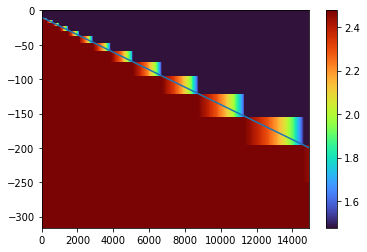

In [12]:
fig = plt.figure()
ax = plt.gca()
xyz.plot_line(0, ax=ax)
ax.plot(xyz.flightlines.xdist, xyz.flightlines.elevation - xyz.flightlines.interface_depth)
fig.colorbar(mappable=ax.collections[0])

# Define the instrument

In [15]:
class MySystem(paperlib.SingleRecvTEMXYZSystem):
    area=340
    i_max=1
    times = np.logspace(-5.5, -2, 16)

# Do the forward modelling

In [16]:
fwd = MySystem(xyz)
xyzresp = fwd.forward()

>> Use multiprocessing for parallelization
>> n_cpu: 3


In [17]:
xyzresp

Unknown
--------------------------------
                                                                          0
gate times for channel 1  [3.162277660168379e-06, 5.411695265464638e-06,...

Soundings: 300
Flightlines: 1
Maximum layer depth: None
Projection: None
           x    y
min      0.0  0.0
max  14950.0  0.0


Layer data: dbdt_ch1gt
Layer params: layer

### Make some realistic data with noise and uncertainties

In [18]:
xyzmeasured = copy.deepcopy(xyzresp)
paperlib.add_noise(xyzmeasured, 0.05)
paperlib.add_uncertainty(xyzmeasured, rel_uncertainty=0.05)

### write output to test inversion in external script

In [19]:
xyzmeasured.dump("outputs/em1dtm_stitched_data.xyz")

### Some plotting


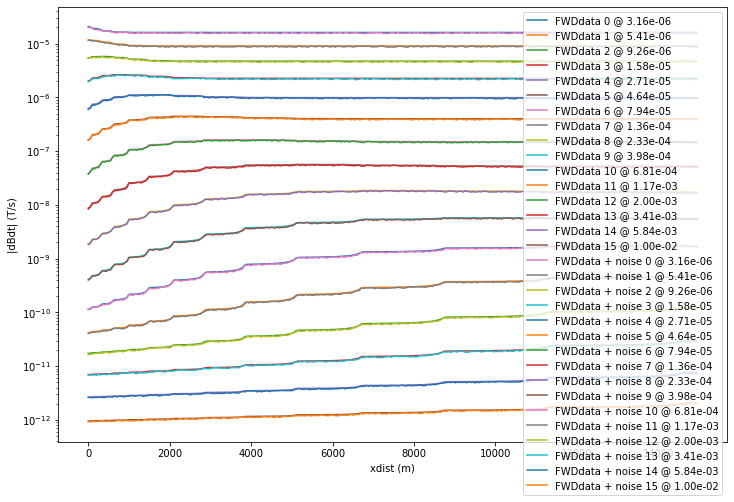

In [20]:
plt.figure(figsize=(12, 8))
xyzresp.plot_line(0, plt.gca(), label="FWDdata %(gate)i @ %(time).2e")
xyzmeasured.plot_line(0, plt.gca(), label="FWDdata + noise %(gate)i @ %(time).2e")
plt.legend()
plt.show()